Want to know the: 
* Top 5 most popular artists 
* Top 5 loudest tracks 
* multiple feature plots 
* duration_ms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the data 
df = pd.read_csv("../input/spotify-chart-data/charts.csv")

In [3]:
#previewing the first 5 rows 
df.head()

,track_id,name,country,date,position,streams,artists,artist_genres,duration,explicit
0,20IvMlpi4U5RuDnAlXSRiV,Crackküche,de,2021-04-15,82,625718,['Haftbefehl'],['german hip hop'],198746,False
1,0V1K6MU0utODk4yNqZKsFv,WATER,jp,2019-01-31,171,50896,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False
2,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-15,59,185439,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
3,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-22,133,111159,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
4,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-29,166,96204,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False


**First we want to clean the data from the file, determine the data type, and learn about the data that we have.**

In [4]:
#dropping the track id column and previewing the new dataframe 
df_tracks = df.drop(['track_id'], axis=1)
df_tracks

,name,country,date,position,streams,artists,artist_genres,duration,explicit
0,Crackküche,de,2021-04-15,82,625718,['Haftbefehl'],['german hip hop'],198746,False
1,WATER,jp,2019-01-31,171,50896,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False
2,Gözleri Aşka Gülen,tr,2018-11-15,59,185439,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
3,Gözleri Aşka Gülen,tr,2018-11-22,133,111159,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
4,Gözleri Aşka Gülen,tr,2018-11-29,166,96204,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
...,...,...,...,...,...,...,...,...,...
5299303,När löven faller,se,2019-11-28,163,165644,['Ebbot Lundberg'],['swedish alternative rock'],252798,False
5299304,ワガママで誤魔化さないで,jp,2019-01-17,161,49580,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False
5299305,ワガママで誤魔化さないで,jp,2019-01-24,139,56826,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False
5299306,ワガママで誤魔化さないで,jp,2019-01-31,151,53897,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False


In [5]:
#looking for null values 
pd.isnull(df_tracks).sum()

name             844
country            0
date               0
position           0
streams            0
artists            0
artist_genres      0
duration           0
explicit           0
dtype: int64

In [6]:
#looking at the column names to determine the data type 
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299308 entries, 0 to 5299307
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   name           object
 1   country        object
 2   date           object
 3   position       int64 
 4   streams        int64 
 5   artists        object
 6   artist_genres  object
 7   duration       int64 
 8   explicit       bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 328.5+ MB


In [7]:
#returning the number of rows and columns in the dataframe 
df_tracks.shape

(5299308, 9)

In [8]:
df_tracks.columns

Index(['name', 'country', 'date', 'position', 'streams', 'artists',
       'artist_genres', 'duration', 'explicit'],
      dtype='object')

Next, we want to determine the following: 
1. What are the top 10 tracks? 
2. What are the lowest 10 tracks? 
3. What is the top trending genre? 
4. How common is the durations? 
5. What is the most popular artist? 
6. What is the top 10 tracks with most valence? 

In [9]:
df_tracking = df_tracks["streams"] = df_tracks["streams"].astype(int)

In [10]:
#top 10 lowest number of streams 
sorted_df = df_tracks.sort_values('streams', ascending = True).head(10)
sorted_df

,name,country,date,position,streams,artists,artist_genres,duration,explicit
146156,Falling,in,2021-07-29,106,0,['Trevor Daniel'],"['pop', 'pop rap', 'melodic rap']",159381,False
2847220,Ain't Shit,hn,2021-09-02,168,0,['Doja Cat'],"['dance pop', 'pop']",174253,True
2609008,Sa Ngalan Ng Pag-Ibig,ph,2021-08-12,131,0,['December Avenue'],"['pinoy pop punk', 'opm']",285138,False
1004282,Vaskar mina tårar,se,2021-07-15,150,0,['Tjuvjakt'],"['swedish pop rap', 'swedish hip hop', 'swedis...",176895,False
2613317,Breaking Me,cy,2021-07-01,55,0,"['Topic', 'A7S']","['german dance', 'scandipop', 'pop dance', 'el...",166793,False
2309475,Anyone,kr,2021-06-10,101,0,['Justin Bieber'],"['pop', 'canadian pop']",190779,False
3340328,Levitating (feat. DaBaby),be,2021-06-17,17,0,"['Dua Lipa', 'DaBaby']","['pop', 'north carolina hip hop', 'uk pop', 'd...",203064,False
4134501,Doo Wop (That Thing),ie,2015-06-11,264,1001,['Ms. Lauryn Hill'],"['urban contemporary', 'r&b', 'new jersey rap'...",320266,False
4961685,Auf anderen Wegen,at,2015-07-23,162,1001,['Andreas Bourani'],['german pop'],269160,False
4769334,Viva La Vida,py,2015-01-18,164,1001,['Coldplay'],"['permanent wave', 'pop']",242373,False


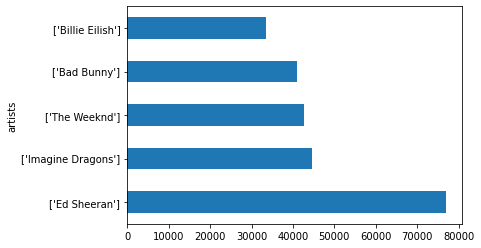

In [11]:
#top five artists 
top_five_artists = df_tracks.groupby("artists").count().sort_values(by ="name", ascending=False)["name"][:5]
top_five_artists
top_five_artists.plot.barh()
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49689 (\N{HANGUL SYLLABLE SUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


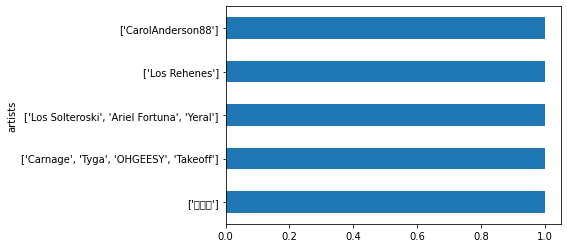

In [12]:
top_five_artists = df_tracks.groupby("artists").count().sort_values(by ="streams", ascending=True)["streams"][:5]
top_five_artists
top_five_artists.plot.barh()
plt.show()

In [13]:
#getting a summary of the dataset 
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
position,5299308.0,98.279595,5.896452e+01,1.0,46.0,97.0,149.0,358.0
streams,5299308.0,307463.829782,1.278270e+06,0.0,13030.0,45224.0,181639.0,84952932.0
duration,5299308.0,212648.441399,4.613954e+04,0.0,185194.0,208520.0,233720.0,9318296.0


In [14]:
#identifying the unique track names of the dataset 
df_unique = df_tracks.name.unique()
df_unique

array(['Crackküche', 'WATER', 'Gözleri Aşka Gülen', ...,
       'När löven faller', 'ワガママで誤魔化さないで', 'Digital Kærlighed'],
      dtype=object)

In [15]:
#getting the top artist genres 

In [16]:
df.describe()

,position,streams,duration
count,5.299308e+06,5.299308e+06,5.299308e+06
mean,9.827960e+01,3.074638e+05,2.126484e+05
std,5.896452e+01,1.278270e+06,4.613954e+04
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.600000e+01,1.303000e+04,1.851940e+05
50%,9.700000e+01,4.522400e+04,2.085200e+05
75%,1.490000e+02,1.816390e+05,2.337200e+05
max,3.580000e+02,8.495293e+07,9.318296e+06


In [24]:
#identifying the different genre types in the dataset
artist_genres_count = df_tracks['artist_genres'].value_counts(dropna=False)
artist_genres_count

['dance pop', 'pop']                                                                                                96687
['pop', 'uk pop']                                                                                                   93434
['pop']                                                                                                             87053
['modern rock', 'rock']                                                                                             57447
['dance pop', 'pop', 'uk pop']                                                                                      52664
                                                                                                                    ...  
['sertanejo', 'sertanejo pop', 'sertanejo universitario', 'axe', 'pagode']                                              1
['uptempo hardcore', 'frenchcore', 'nederlandse hardstyle', 'tekk']                                                     1
['country', 'adult stand